<a href="https://colab.research.google.com/github/mzk8888/Web3.0/blob/main/TraQ_Makers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pretty_midi
#install packages
! apt install fluidsynth
!cp /usr/share/sounds/sf2/fluidR3_GM.sf2 ./font.sf2
!pip install midi2audio
!pip install playsound

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=e206ca015b4f6a5c7c0e240d5c1269b3d10c027b7d470df4e72768a30306953d
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 li

In [ ]:
!pip install pennylane
import tqdm
from pennylane import numpy as np #普通のnumpyは使わない！
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane.templates import StronglyEntanglingLayers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 78.2 MB/s eta 0:00:00


In [ ]:
import IPython
import pandas as pd
import random

random.seed(42)

notes = ["R","C3","D3","E3","F3","G3","A3","B3"]
number = [0,1,2,3,4,5,6,7]

# notes = ["R","C3","G3","D3","A3","E3","B3","F3","C4","G4","D4","A4","E4","B4","F4","C5"]
# number = [0,1,5,2,6,3,7,4,11,55,22,66,33,77,44,111]

#==============================#
#ここを編集して音楽を入力
#==============================#
#========================================================================================================================================#
song1 = [0,1,3,4,5,5,5,5,5,1,3,4,5,5,5,5,5,1,3,4,5,5,3,3,1,1,3,3,2,2,2,2,2,3,3,2,1,1,1,1,3,3,5,5,5,4,4,4,4,0,6,6,5,5,3,3,1,1,2,2,1,1,1,1,
         0,1,3,4,5,5,5,5,5,1,3,4,5,5,5,5,5,1,3,4,5,5,3,3,1,1,3,3,2,2,2,2,2,3,3,2,1,1,1,1,3,3,5,5,5,4,4,4,4,0,6,6,5,5,3,3,1,1,2,2,1,1,1,1,
         0,1,3,4,5,5,5,5,5,1,3,4,5,5,5,5,5,1,3,4,5,5,3,3,1,1,3,3,2,2,2,2,2,3,3,2,1,1,1,1,3,3,5,5,5,4,4,4,4,0,6,6,5,5,3,3,1,1,2,2,1,1,1,1]
pred_points = 20 #予測する音の数（曲の長さ）
max_steps = 20 #学習回数
Nsample = 100
#========================================================================================================================================#

par = 2 #partition
notes_copy = notes
song1_num = []

def notes_to_number(note):
  num = []
  for i in note:
      index = number.index(i)
      num.append(index)
  return num

song1_num = notes_to_number(song1)
song1_num = song1_num


In [ ]:
def convert_to_binary_arrays(arr):
    max_bits = 4#len(bin(max(arr))) -2 #最大の要素のビット数を取得
    A = []
    B = []
    C = []
    D = []

    for num in arr:
        binary = bin(num)[2:].zfill(max_bits) #最大のビット数にゼロパディングして２進数に変換
        #各ビットを別の配列に代入
        A.append(int(binary[-1]))
        B.append(int(binary[-2]))
        C.append(int(binary[-3]))
        D.append(int(binary[-4]))

    return A, B, C, D


In [ ]:
#配列を2進数に変換して各ビットを別の配列に代入する
A1, B1, C1, D1 = convert_to_binary_arrays(song1) #A1が最下位ビット
bits1 = np.zeros((2, pred_points))
bits2 = np.zeros((2, pred_points))


In [ ]:
print(A1)
print(B1)
print(C1)
print(D1)

[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
print(bits1)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


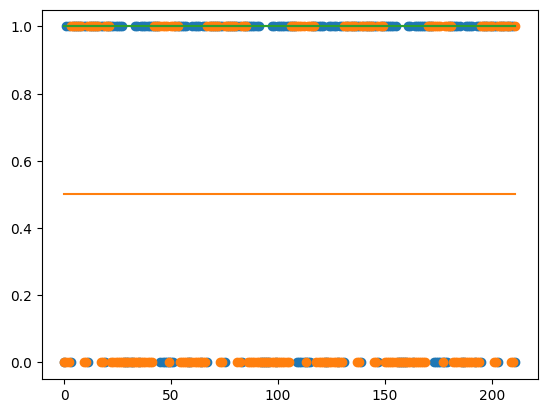

[[0.54166667 0.45833333]
 [0.16935484 0.83064516]]
[[0.86407767 0.13592233]
 [0.1884058  0.8115942 ]]


100%|██████████| 20/20 [02:10<00:00,  6.50s/it]


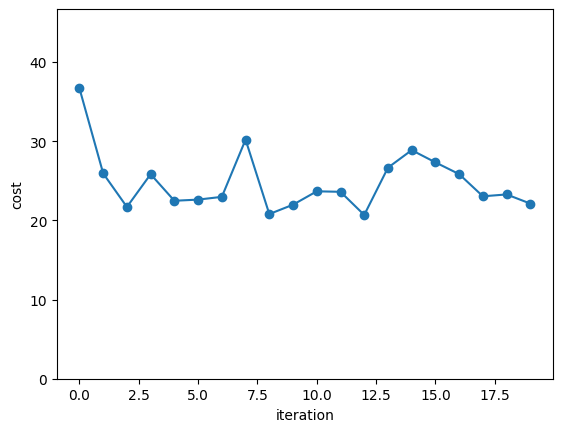

100%|██████████| 100/100 [00:28<00:00,  3.48it/s]


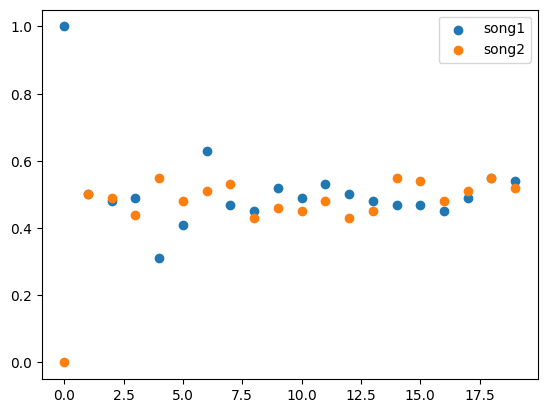

[[1.   0.5  0.48 0.49 0.31 0.41 0.63 0.47 0.45 0.52 0.49 0.53 0.5  0.48
  0.47 0.47 0.45 0.49 0.55 0.54]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]]
[[0.   0.5  0.49 0.44 0.55 0.48 0.51 0.53 0.43 0.46 0.45 0.48 0.43 0.45
  0.55 0.54 0.48 0.51 0.55 0.52]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]]


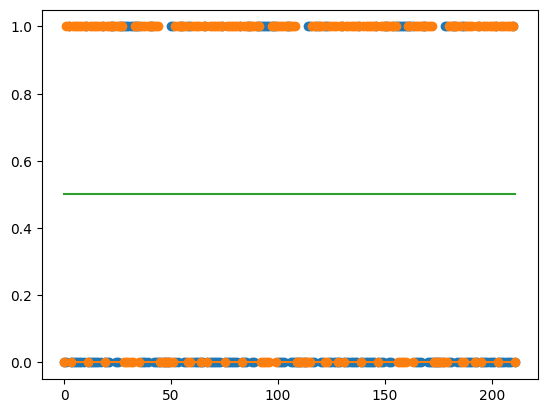

[[0.77981651 0.22018349]
 [0.38095238 0.61904762]]
[[0.54166667 0.45833333]
 [0.16935484 0.83064516]]


100%|██████████| 20/20 [02:06<00:00,  6.34s/it]


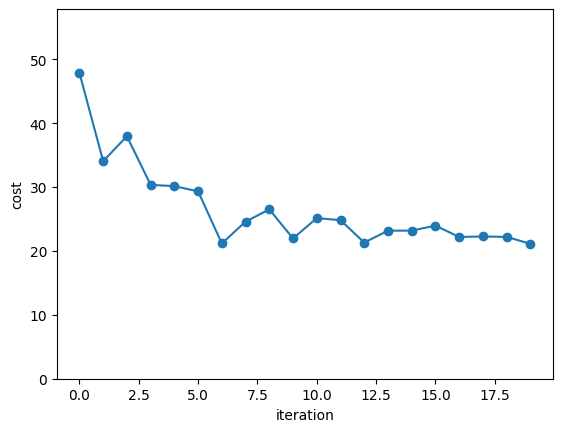

100%|██████████| 100/100 [00:27<00:00,  3.68it/s]


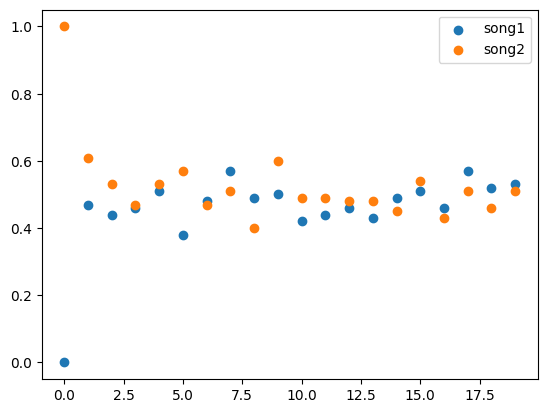

[[1.   0.5  0.48 0.49 0.31 0.41 0.63 0.47 0.45 0.52 0.49 0.53 0.5  0.48
  0.47 0.47 0.45 0.49 0.55 0.54]
 [0.   0.47 0.44 0.46 0.51 0.38 0.48 0.57 0.49 0.5  0.42 0.44 0.46 0.43
  0.49 0.51 0.46 0.57 0.52 0.53]]
[[0.   0.5  0.49 0.44 0.55 0.48 0.51 0.53 0.43 0.46 0.45 0.48 0.43 0.45
  0.55 0.54 0.48 0.51 0.55 0.52]
 [1.   0.61 0.53 0.47 0.53 0.57 0.47 0.51 0.4  0.6  0.49 0.49 0.48 0.48
  0.45 0.54 0.43 0.51 0.46 0.51]]


In [ ]:
note1 = [A1, B1]
note2 = [C1, A1]
for l in range(len(note1)):

  df1 = pd.DataFrame({"note":note1[l]})
  df2 = pd.DataFrame({"note":note2[l]})
  df_ref1 = pd.DataFrame({"note":note1[l]})
  df_ref2 = pd.DataFrame({"note":note2[l]})

  cdata1 = []
  cdata2 = []
  cdata_ref1 = []
  cdata_ref2 = []

  for i in df1['note']: #終値のみ格納する
    cdata1.append(i)

  for i in df2['note']:
    cdata2.append(i)

  for i in df_ref1['note']:
    cdata_ref1.append(i)

  for i in df_ref2['note']:
    cdata_ref2.append(i)

  data1 = []
  data2 = []
  for i in range(len(cdata1)):
    data1.append(cdata1[i])
    data2.append(cdata2[i])

  for i in range(pred_points):
    data1.append(cdata_ref1[i])
    data2.append(cdata_ref2[i])

  # df_log1 = np.log(data1)
  # df_log2 = np.log(data2)
  df_log1 = data1
  df_log2 = data2

  # diff_series1 = np.diff(df_log1) #隣り合う値の差分（後の値-前の値）
  # diff_series2 = np.diff(df_log2)

  diff_series1 = df_log1
  diff_series2 = df_log2

  def make_range(y, par = par):
    max_y = max(y)
    min_y = min(y)
    range_list = np.percentile(y, q = list(range(0,100,int(100/par)))[1:]) #qは区分けの分割数

    temp_list = np.concatenate([[min_y],range_list])
    temp_list = np.concatenate([temp_list,[max_y]])

    ave_list = [] #この分割方法はもっと賢いやり方もある.標準偏差の2σ3σとか
    for k in range(len(temp_list) - 1):
      ave_list.append((temp_list[k] + temp_list[k+1])/2)

    return range_list, ave_list

  range_list1, ave_list1 = make_range(diff_series1[:-pred_points])
  range_list2, ave_list2 = make_range(diff_series2[:-pred_points])

  # plt.plot(diff_series1)
  # plt.plot(diff_series2)
  plt.scatter(range(len(diff_series1)), diff_series1)
  plt.scatter(range(len(diff_series2)), diff_series2)

  plt.plot(range(len(diff_series1)), range_list1[0] * np.ones(len(diff_series1)))

  for i in range(par):
    plt.plot(range(len(diff_series1)), ave_list1[i] * np.ones(len(diff_series1)))

  plt.show()


#==========================================================================
  def make_discrete(y, range_list, par = par):
    dis_time = []
    for v in y:
      if v == 0:
            dis_time.append(v)
      else:
            dis_time.append(v)
    return dis_time
#==========================================================================

  dis_time1 = make_discrete(diff_series1[:-pred_points], range_list1)
  dis_time2 = make_discrete(diff_series2[:-pred_points], range_list2)

#==========================================================================
  def make_mat(dis_time, par = par):
    mat = np.zeros([par, par])
    for time in range(len(dis_time)-pred_points):
      t1 = dis_time[time]
      t2 = dis_time[time + 1]
      mat[t1][t2] += 1

    z_list = []
    for p in range(par):
      sum_row = sum(mat[p,:])
      if(sum_row != 0):
        z_list.append([sum_row])
      else:
        z_list.append([1])


    mat = mat/np.array(z_list)

    return mat
#==========================================================================

  mat1 = make_mat(dis_time1)
  mat2 = make_mat(dis_time2)

  print(mat1)
  print(mat2)

  def make_mat_k(mat, k):
    mat = np.matrix(mat)
    return mat**(k+1) #行列の掛け算

  qubits_data = int(np.log2(par)) * 2 #データ格納のための量子ビット
  qubits_data_ancilla = qubits_data #余分に用意しておく量子ビット
  n_qubits = qubits_data + qubits_data_ancilla

  dev = qml.device('default.qubit', wires = n_qubits)
  @qml.qnode(dev, interface = "autograd") #自動微分
  def circuit(weights, gamma, state1, state2, t, qubits_data, qubits_data_ancilla):
    #gamma：動かす変数
    #state1, state2:株価の変動（上がる・下がる）
    n_qubits = qubits_data + qubits_data_ancilla

    #GoogleとIBMの株価データを一緒に扱ってエンタングルさせる
    qubits_data1 = int(qubits_data/2)
    qubits_data2 = int(qubits_data/2)

    bin_str = '0' + str(int(np.log2(par))) + 'b' #binary string, この書き方は固定

    for i in range(qubits_data1):
      qml.PauliX(i) ** int(format(state1, bin_str)[i]) #Pauli:0と1を反転、stateを2進数表示したときの各位の値に応じて量子ビットの状態を決定する

    for j in range(qubits_data2):
      qml.PauliX(j + qubits_data1) ** int(format(state2, bin_str)[j])

    StronglyEntanglingLayers(weights, wires = range(n_qubits)) #エンタングルさせまくればいいわけではない

    for i in range(n_qubits):
      qml.RZ(t * gamma[i], wires = i) #ここは試行錯誤
      # qml.RX(t * gamma[i], wires = i)

    qml.adjoint(StronglyEntanglingLayers)(weights, wires = range(n_qubits))#エルミート共役を取る

    return [qml.probs(wires = [i for i in range(qubits_data1)]), \
            qml.probs(wires = [i + qubits_data1 for i in range(qubits_data2)])]

  Qnode = qml.QNode(circuit, dev)

  def cost(weights_ansatz, gamma, qubits_data, qubits_data_ancilla, mat1, mat2, Tmat = pred_points, ep = 10e-4):
    c = 0
    for t in range(Tmat):
      for s1 in range(par):
        for s2 in range(par):
          [output1, output2] = Qnode(weights_ansatz, gamma, s1, s2, t,  qubits_data, qubits_data_ancilla)
          mat_k1 = np.array(make_mat_k(mat1, t))
          mat_k2 = np.array(make_mat_k(mat2, t))

          for i in range(len(output1)):
            #KL情報量（二つの確率分布の比較、近い確率分布ほど値は小さくなる）
            c += output1[i] * np.log(output1[i]/(mat_k1[i][s1] + ep)) #ep：ゼロ割り防止

          for i in range(len(output2)):
            c += output2[i] * np.log(output2[i]/(mat_k2[i][s1] + ep))
    return c #コスト関数

  opt = qml.AdamOptimizer(0.2)
  shape = StronglyEntanglingLayers.shape(n_layers = 1, n_wires = n_qubits)
  weights_ansatz = 2 * np.pi * np.random.random(size = shape) #パラメータの初期化
  gamma = 2 * np.pi * np.random.random(n_qubits)
  cost_series = []

  for step in tqdm.tqdm(range(max_steps)):
    cost_temp = cost(weights_ansatz, gamma, qubits_data, qubits_data_ancilla, mat1, mat2)
    cost_series.append(cost_temp)
    weights_ansatz, gamma, _, _, _, _ = opt.step(cost, weights_ansatz, gamma, qubits_data, qubits_data_ancilla, mat1, mat2)

  plt.plot(cost_series, marker="o")
  plt.ylim(0,max(cost_series)+10)
  plt.xlabel("iteration")
  plt.ylabel("cost")
  plt.show()

  Tpred = pred_points

  state_sample1 = []
  state_sample2 = []

  for sample in tqdm.tqdm(range(Nsample)):
    state1 = dis_time1[-1] #最初の値を教える
    state2 = dis_time2[-1]
    state_series1 = []
    state_series2 = []

    for t in range(Tpred):
      prob1, prob2 = Qnode(weights_ansatz, gamma, state1, state2, t, qubits_data, qubits_data_ancilla)
      state1 = np.random.choice(par, p = prob1)
      state2 = np.random.choice(par, p = prob2)
      state_series1.append(state1)
      state_series2.append(state2)

    state_sample1.append(state_series1)
    state_sample2.append(state_series2)

  pred_sample1 = []

  for state_series1 in state_sample1:
    pred_series1 = []
    for itemp in state_series1:
      pred_series1.append(itemp)
    pred_sample1.append(pred_series1)

  pred_sample2 = []

  for state_series2 in state_sample2:
    pred_series2 = []
    for itemp in state_series2:
      pred_series2.append(itemp)
    pred_sample2.append(pred_series2)

  ave1 = np.zeros(len(pred_series1))
  for pred_series1 in pred_sample1:
    ave1 += np.array(pred_series1)
  ave1 = ave1/len(pred_sample1)

  ave2 = np.zeros(len(pred_series2))
  for pred_series2 in pred_sample2:
    ave2 += np.array(pred_series2)
  ave2 = ave2/len(pred_sample2)

  # log_recon1 = np.cumsum(ave1) #cummulative summation（積算和）
  # log_recon2 = np.cumsum(ave2)

  log_recon1 = ave1
  log_recon2 = ave2

  #変動比率！！
  plt.scatter(range(len(log_recon1)), log_recon1, label = 'song1')
  plt.scatter(range(len(log_recon1)), log_recon2, label = 'song2')
  # plt.scatter(range(len(log_recon1)), log_recon1, label = 'frog')
  # plt.scatter(range(len(log_recon1)), log_recon2, label = 'star')

  plt.legend()
  plt.show()

  bits1[l] = np.array(log_recon1)
  bits2[l] = np.array(log_recon2)
  print(bits1)
  print(bits2)

In [ ]:
def bin_to_decimal(array):
    bits_len = 3
    decimal_array = []
    for col in np.array(array).T:  # 列ごとに処理
        binary = ''.join(str(int(val)) for val in col)  # 列の値を2進数に変換
        binary_with_separator = ''.join([binary[i:i+bits_len] for i in range(0, len(binary), bits_len)])  # 4ビットごとに区切る
        decimal = int(binary_with_separator, 2) # 2進数を10進数に変換
        decimal_array.append(decimal)
    return decimal_array

In [ ]:
def round_matrix(matrix):
    rounded_matrix = [[int(num + 0.5) if num > 0 else int(num - 0.5) for num in row] for row in matrix]
    return rounded_matrix

In [ ]:
bits_song = np.concatenate((bits1[0:2],bits2[0:1]),axis=0)
print(bits_song)

[[1.   0.5  0.48 0.49 0.31 0.41 0.63 0.47 0.45 0.52 0.49 0.53 0.5  0.48
  0.47 0.47 0.45 0.49 0.55 0.54]
 [0.   0.47 0.44 0.46 0.51 0.38 0.48 0.57 0.49 0.5  0.42 0.44 0.46 0.43
  0.49 0.51 0.46 0.57 0.52 0.53]
 [0.   0.5  0.49 0.44 0.55 0.48 0.51 0.53 0.43 0.46 0.45 0.48 0.43 0.45
  0.55 0.54 0.48 0.51 0.55 0.52]]


In [ ]:
import pprint
song_gen  = round_matrix(bits_song)
song_gen[0] = np.round(bits_song[0])
res = song_gen
for i in range(len(res)):
  print(res[i])

song_gen1 = bin_to_decimal(song_gen[::-1])

print(song_gen1)

[1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
[1, 4, 0, 0, 6, 0, 5, 6, 0, 3, 0, 1, 0, 0, 4, 6, 0, 6, 7, 7]


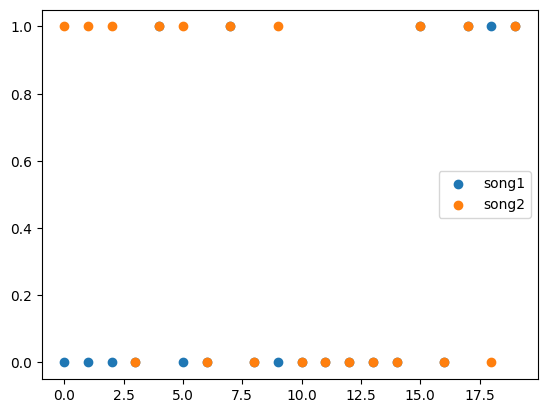

In [ ]:
#変動比率！！
plt.scatter(range(len(log_recon1)), np.round(log_recon1), label = 'song1')
plt.scatter(range(len(log_recon1)), np.round(log_recon2), label = 'song2')
# plt.scatter(range(len(log_recon1)), log_recon1, label = 'frog')
# plt.scatter(range(len(log_recon1)), log_recon2, label = 'star')

plt.legend()
plt.show()

In [ ]:
rand_music = np.random.randint(0,7,pred_points)
print(rand_music)

[4 2 4 5 6 4 4 0 0 3 5 3 2 2 5 3 4 4 4 4]


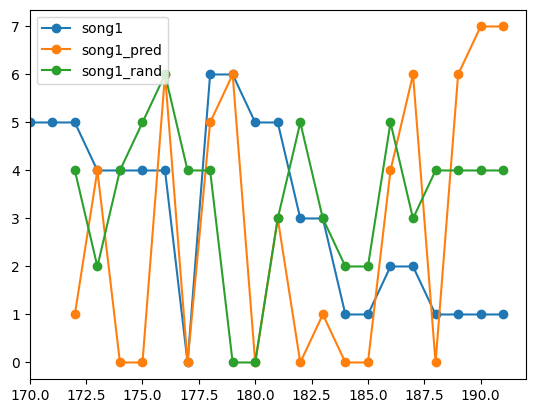

In [ ]:
plt.plot(range(len(song1)), song1, marker = 'o', label = 'song1')
plt.plot(list(range(len(song1)-pred_points,len(song1),1)), song_gen1, marker = 'o', label = 'song1_pred')
plt.plot(list(range(len(song1)-pred_points,len(song1),1)), rand_music, marker = 'o', label = 'song1_rand')
plt.legend()
plt.xlim(len(song1)-pred_points-2, len(song1))
plt.show()

In [ ]:
# plt.plot(range(len(song2)), song2, marker = 'o',  label = 'song2')
# plt.plot(list(range(len(song2)-pred_points,len(song2),1)), song_gen2, marker = 'o', label = 'song2_pred')
# plt.legend()
# # plt.xlim(120,150)
# plt.show()

In [ ]:
# 音階名のリストを取得する
def restore_notes(song):
    restored_notes = []
    notes = notes_copy
    for number in song:
        try:
            restored_notes.append(notes[number])
        except ValueError:
            print(f"Index {number} not found in numbers list.")
            # エラー処理: 該当する番号が見つからない場合、代わりに空文字列を追加するなど、適切な処理を行います。
            # ここでは、空文字列を追加する例を示しますが、使用状況に応じて変更してください。
            restored_notes.append('')
    return restored_notes

# notes = ["R","C3","D3","E3","F3","G3","A4","B4","C4","D4","E4","F4","G4","A5","B5","C5"]
# notes_copy = notes
# number = [  0,   1,   2,   3,   4,   5,   6,   7,  11,  22,  33,  44,  55,  66, 111, 222]
# number = [  0,   1,   2,   3,   4,   5,   6,   7,  8,  22,  33,  44,  55,  66, 111, 222]

print(song_gen1)
song_gen_note1 = restore_notes(song_gen1)
print(song_gen_note1)
# song_gen_note2 = restore_notes(number, notes, song_gen2)
song_note1     = restore_notes(song1)
# song_note2     = restore_notes(number, notes, song2)
# song_input = [1,1,1,2,3,3,5,5,3,3,2,2,1,1,0,0,3,3,3,4,5,5,11,11, 6,11,5,0,11,11,11,11,7,7,5,5,6,6,6,6,5,5,0,0,1,1,1,2,3,3,5,5,3,3,2,2,1,1,0,0]
# song_input = notes_to_number(song_input)
# song_origin = restore_notes(number, notes, song_input)

[1, 4, 0, 0, 6, 0, 5, 6, 0, 3, 0, 1, 0, 0, 4, 6, 0, 6, 7, 7]
['C3', 'F3', 'R', 'R', 'A3', 'R', 'G3', 'A3', 'R', 'E3', 'R', 'C3', 'R', 'R', 'F3', 'A3', 'R', 'A3', 'B3', 'B3']


In [ ]:
import pretty_midi
import IPython.display as ipd

def music_gen(notes):
  # BPMとノート情報の定義
  bpm = 120
  # PrettyMIDIオブジェクトを作成
  midi_data = pretty_midi.PrettyMIDI(initial_tempo=bpm)

  # インストゥルメントを作成
  program = pretty_midi.instrument_name_to_program('Acoustic Grand Piano')
  piano = pretty_midi.Instrument(program=program)

  # ノートを生成し、アルペジオを作成
  start_time = 0
  note_duration = 0.5  # 0.5秒ずつの音符
  for note_name in notes:
    if note_name == 'R':
              start_time += note_duration  # 休符の場合はstart_timeを進める
    else:
        note_number = pretty_midi.note_name_to_number(note_name)
        note = pretty_midi.Note(velocity=100, pitch=note_number, start=start_time, end=start_time + note_duration)
        piano.notes.append(note)
        start_time += note_duration
      # note_number = pretty_midi.note_name_to_number(note_name)
      # note = pretty_midi.Note(velocity=100, pitch=note_number, start=start_time, end=start_time + note_duration)
      # piano.notes.append(note)
      # start_time += note_duration

  # インストゥルメントをPrettyMIDIオブジェクトに追加
  midi_data.instruments.append(piano)

  # MIDIデータをファイルとして保存
  midi_data.write('arpeggio.mid')

  from midi2audio import FluidSynth
  # Define sound font
  fs = FluidSynth(sound_font='/content/font.sf2')
  # Define path of midi(input) and mp3(output)
  # You can also  choose .wav file extension.
  fs.midi_to_audio('/content/arpeggio.mid', '/content/music.mp3')

  ipd.display(ipd.Audio("/content/music.mp3"))

music_gen(song_gen_note1)
# music_gen(song_gen_note2)


# music_gen(song_note2)

In [ ]:
song_origin = restore_notes(song1[-pred_points*2:-1])
music_gen(song_origin)

In [ ]:
song_rand = restore_notes(rand_music)
music_gen(song_rand)

In [ ]:
import tensorflow as tf

# 例として、入力データが100次元のベクトルである場合
input_shape = 100  # 入力データの次元数

# 出力層のユニット数（例えば、分類問題でクラスが3つの場合）
output_shape = 3

# モデルをトレーニングするコード
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(output_shape, activation='softmax')
])

# モデルの保存
model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from google.colab import files
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>